In [2]:
suppressMessages(suppressWarnings(source("config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect 


In [4]:
fdiry = file.path(FD_RES, "model_linear", "interactive_filter95")
dir(fdiry)

[1] "chr1"  "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17"
[10] "chr18" "chr19" "chr2"  "chr20" "chr21" "chr22" "chr3"  "chr4"  "chr5" 
[19] "chr6"  "chr7"  "chr8"  "chr9"  "chrX"  "chrY"

In [2]:
fdiry = file.path(FD_WRK, "model_linear")
#fdiry = file.path(FD_RES, "model_linear")
fname = "res_interactive_chr21.rds"
fpath = file.path(fdiry, fname)
lst_res = readRDS(fpath)

In [3]:
lst_motif_pair = head(names(lst_res))
list(lst_motif_pair)

[[1]]
[1] "AIRE|AP1_1"      "AIRE|AP1_2"      "AIRE|BATF"       "AIRE|BCL6_1"    
[5] "AIRE|BCL6_2"     "AIRE|CCAAT_CEBP"

In [4]:
dat_motif_pair = names(lst_res)
dat_motif_pair = sapply(dat_motif_pair, function(x){
    res = str_split(string = x, pattern = "\\|", simplify = TRUE)
    return(res)
})
dat_motif_pair = as.data.frame(t(dat_motif_pair))
colnames(dat_motif_pair) = c("motif1", "motif2")
head(dat_motif_pair)

,motif1,motif2
AIRE|AP1_1,AIRE,AP1_1
AIRE|AP1_2,AIRE,AP1_2
AIRE|BATF,AIRE,BATF
AIRE|BCL6_1,AIRE,BCL6_1
AIRE|BCL6_2,AIRE,BCL6_2
AIRE|CCAAT_CEBP,AIRE,CCAAT_CEBP


In [5]:
pval = lapply(lst_res, function(res){
    res = coef(res)
    if (nrow(res) < 7){
        return(NA)
    } else {
        return(res[7, 4])
    }
})

In [6]:
unlist(head(pval)) %>% class

[1] "numeric"

In [7]:
tmp = dat_motif_pair
tmp$pval = unlist(pval)
tmp$nlogpval = -log10(tmp$pval)
head(tmp)

,motif1,motif2,pval,nlogpval
AIRE|AP1_1,AIRE,AP1_1,0.001012165,2.994749
AIRE|AP1_2,AIRE,AP1_2,NA,NA
AIRE|BATF,AIRE,BATF,NA,NA
AIRE|BCL6_1,AIRE,BCL6_1,NA,NA
AIRE|BCL6_2,AIRE,BCL6_2,NA,NA
AIRE|CCAAT_CEBP,AIRE,CCAAT_CEBP,NA,NA


In [9]:
mat = tmp %>% dplyr::select(motif1, motif2, nlogpval) %>% spread(motif2, nlogpval)
mat = column_to_rownames(mat, var = "motif1")

idx = colnames(mat)
mat = mat[idx,]
mat[is.na(mat)] = 0
mat = mat + t(mat)
mat_ori = mat
head(mat_ori)

,AP1_1,AP1_2,BATF,BCL6_1,BCL6_2,CCAAT_CEBP,CENBP,CREB_ATF_1,CREB_ATF_2,CREB_ATF_3,...,ZNF586,ZNF667,ZNF680,ZNF708,ZNF713,ZNF768,ZNF784,ZNF85,ZSCAN3,ZSCAN4
AP1_1,0.000000,4.1379671,5.60371664,5.0599622,4.65008267,0.00000000,0.0000000,5.4394349,6.7925870,4.72225862,...,3.493807,4.9043985,4.8433145,4.8019525,2.5429865,5.091039,4.8875694,6.156090,5.922371,5.33316750
AP1_2,4.137967,0.0000000,0.87086668,1.3459657,1.16843717,0.62711757,0.5705857,1.2236592,1.0111610,0.85479006,...,0.416429,0.4956072,0.9752314,1.9363166,0.5657511,2.747165,1.0351508,1.260392,4.542334,1.04691223
BATF,5.603717,0.8708667,0.00000000,0.0000000,0.03023764,0.00000000,0.2816897,0.4336053,0.6304394,0.84005868,...,0.000000,4.8443547,0.4005902,0.5381836,0.0000000,1.178765,0.4177381,2.719188,4.588374,0.06640791
BCL6_1,5.059962,1.3459657,0.00000000,0.0000000,0.91323818,0.00000000,0.0000000,0.0000000,0.5226038,0.00000000,...,0.000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.0000000,3.411276,3.232189,0.00000000
BCL6_2,4.650083,1.1684372,0.03023764,0.9132382,0.00000000,0.08104449,0.3283915,0.2357549,0.5124381,0.01181336,...,0.000000,4.8009655,0.1968834,0.4771770,0.0000000,1.548118,0.1721731,2.523917,3.787503,0.16600037
CCAAT_CEBP,0.000000,0.6271176,0.00000000,0.0000000,0.08104449,0.00000000,0.0000000,0.0000000,0.0000000,1.96969370,...,0.000000,2.3435067,0.7305754,0.2873901,0.0000000,1.286376,0.5636789,3.024040,4.403346,0.00000000


In [15]:
idx = apply(mat_ori, 1, mean)
idx = (idx > 3)
mat_fil = mat_ori[idx, idx]
print(dim(mat_fil))
print(which(colnames(mat_fil) == "NR_20"))
print(which(colnames(mat_fil) == "AP1_1"))
head(mat_fil)

[1] 27 27
[1] 13
[1] 1


,AP1_1,Ebox_CACCTG,Ebox_CACGTG_1,Ebox_CAGATGG,FOX_4,FOX_7,HSF,INSM1,KLF_SP_1,MZF1,...,TBX_4,TEAD,TFAP2_1,ZNF134,ZNF257,ZNF331,ZNF332,ZNF382,ZNF667,ZSCAN3
AP1_1,0.000000,4.707484,7.033646,3.563758,8.322793,9.487001,5.160862,6.2541064,4.273989,6.259273,...,7.360336,7.364251,6.444155,7.189560,6.090296,2.842966,7.259077,6.166623,4.904398,5.922371
Ebox_CACCTG,4.707484,0.000000,7.786683,3.169570,9.525378,6.655402,7.075255,6.3475855,5.090914,8.605348,...,8.471693,8.278093,6.428972,8.970721,7.241235,7.828395,7.126490,7.720857,4.249878,6.074846
Ebox_CACGTG_1,7.033646,7.786683,0.000000,4.384521,7.165064,6.682946,6.765728,0.4303913,3.280969,8.435705,...,5.691960,5.762535,9.073839,5.702443,6.225747,7.598387,3.182813,5.267164,5.846516,5.512194
Ebox_CAGATGG,3.563758,3.169570,4.384521,0.000000,5.234522,5.466217,6.024884,3.8345382,2.277888,6.315162,...,4.562767,2.534290,2.945036,3.419681,5.154657,3.094064,6.228433,4.007945,4.283707,4.131088
FOX_4,8.322793,9.525378,7.165064,5.234522,0.000000,9.029400,11.343120,6.3955925,5.344922,7.448462,...,8.098548,10.604570,4.394397,9.650508,4.587402,6.814029,7.729243,11.278980,7.888957,6.722930
FOX_7,9.487001,6.655402,6.682946,5.466217,9.029400,0.000000,9.382368,6.1891618,4.451193,7.179687,...,6.463311,6.882524,6.513595,5.713565,6.512584,6.678971,5.934531,6.869425,7.525514,5.491185


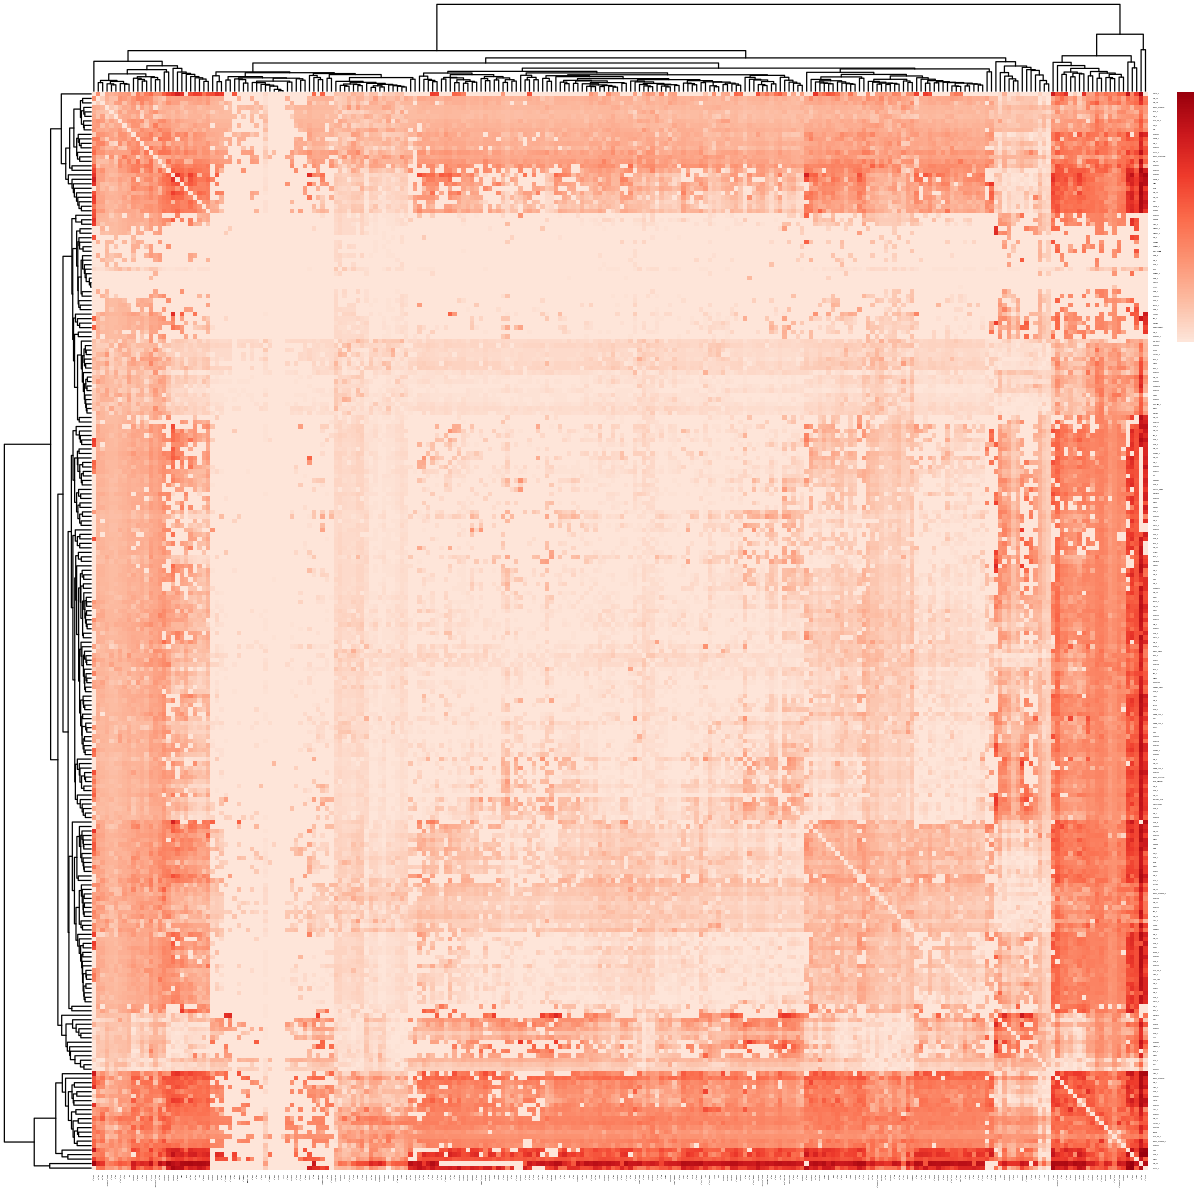

In [16]:
options(repr.plot.width=10, repr.plot.height=10)
out = pheatmap(
    mat_ori, 
    fontsize = 1,
    color = colorRampPalette(brewer.pal(n = 7, name="Reds"))(100))

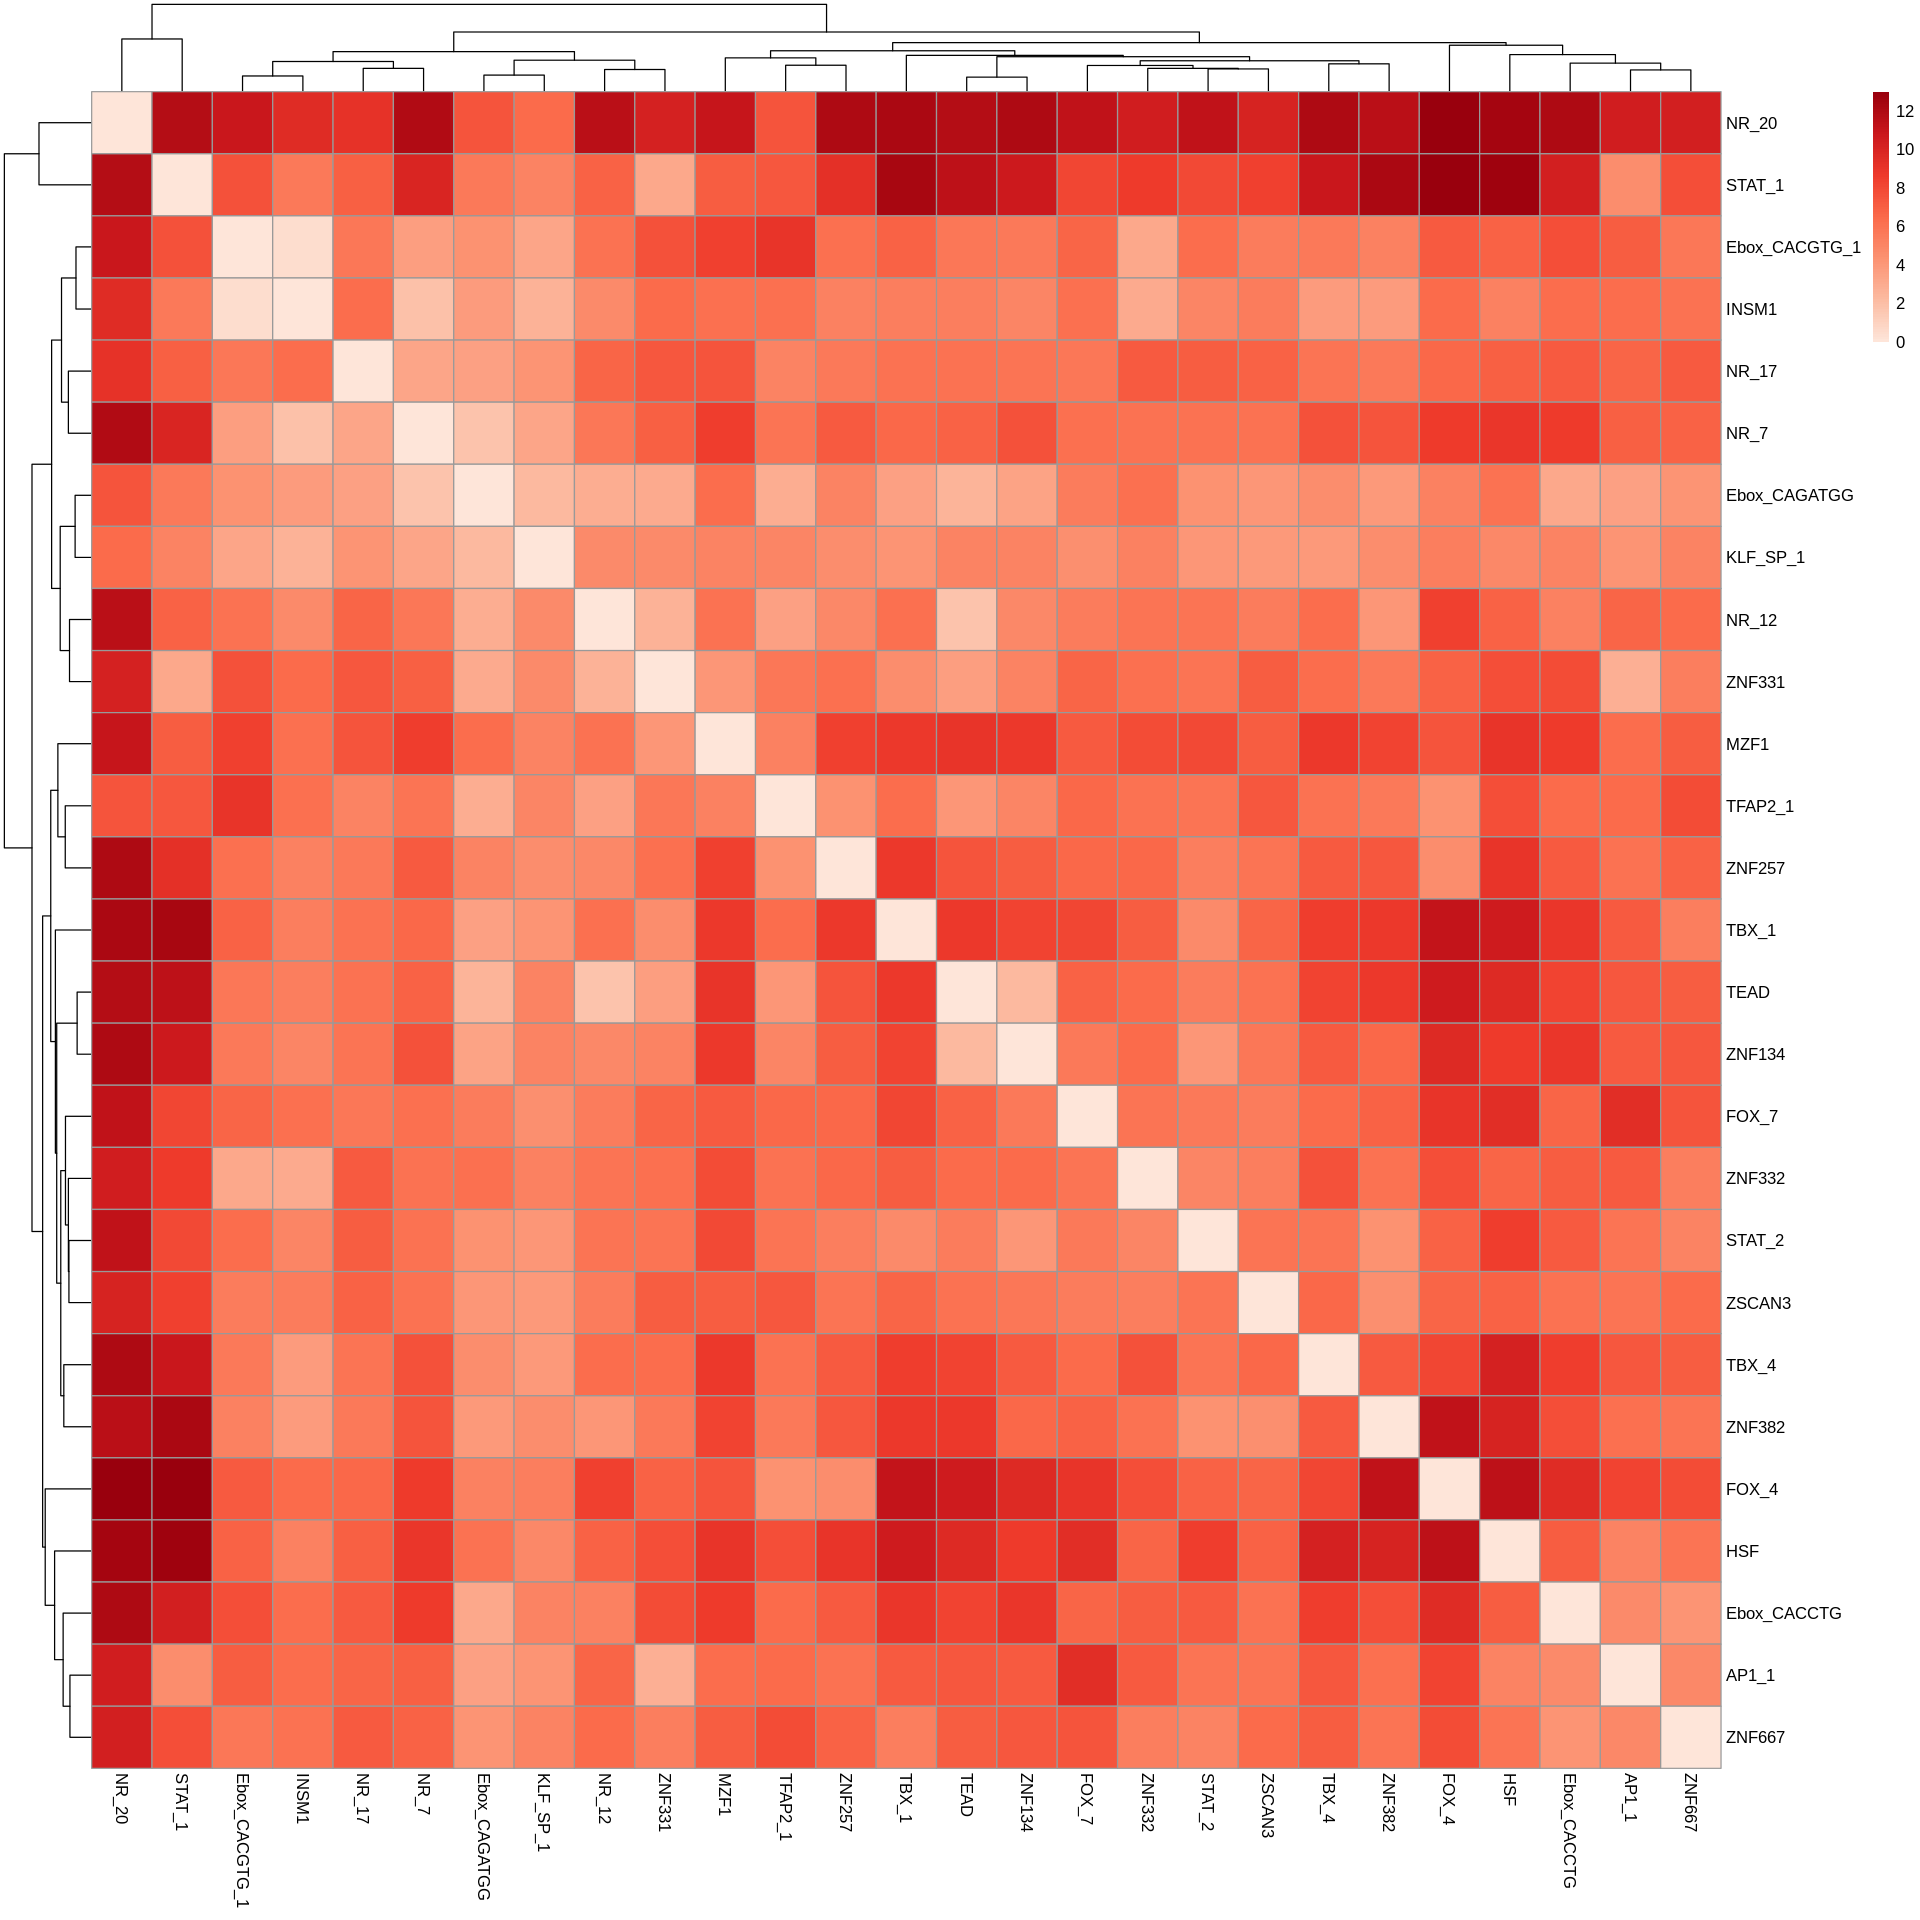

In [19]:
options(repr.plot.width=16, repr.plot.height=16)
out = pheatmap(
    mat_fil, 
    fontsize = 10,
    color = colorRampPalette(brewer.pal(n = 7, name="Reds"))(100))

In [20]:
print(length(idx))
print(which(colnames(mat_fil)[out$tree_col[["order"]]] == "NR_20"))

[1] 240
[1] 1


In [22]:
tmp = mat_fil[out$tree_row[["order"]], "NR_20", drop=FALSE]
tmp 

,NR_20
NR_20,0.000000
STAT_1,11.823499
Ebox_CACGTG_1,10.877360
INSM1,9.551983
NR_17,9.186386
NR_7,11.909997
Ebox_CAGATGG,7.486377
KLF_SP_1,6.489889
NR_12,11.451857
ZNF331,10.275301


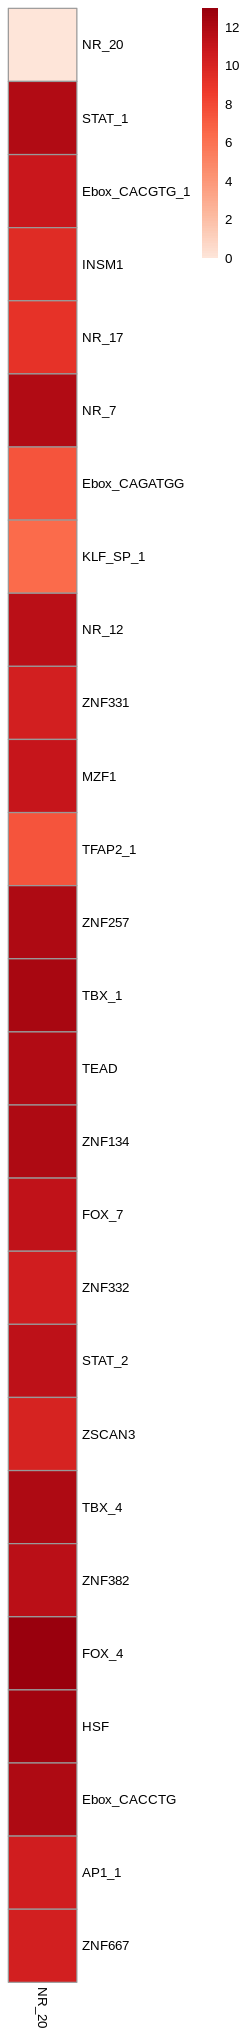

In [21]:
options(repr.plot.width=2, repr.plot.height=17)
pheatmap(mat_fil[out$tree_row[["order"]], "NR_20", drop=FALSE], 
         cluster_cols = FALSE, cluster_rows = FALSE,
         fontsize = 8,
         color = colorRampPalette(brewer.pal(n = 7, name="Reds"))(100))